In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
dfMem = pd.read_csv('hpq_mem.csv', low_memory=False);

#Loads 'main.csv' and 'hpq_mem.csv'

In [3]:
dfMain = dfMain.filter(['mainid','brgy']);
dfMem = dfMem.filter(['mainid','educal']);

#Filters the two dataframes to show only the relevant columns

In [4]:
dfMainMem = pd.merge(dfMain, dfMem, left_on='mainid', right_on='mainid', how='left');

# Joins dfMain with dfMem using matching mainids
dfMainMem

,mainid,brgy,educal
0,1061066,186,NaN
1,1061066,186,300.0
2,1061066,186,32.0
3,555683,69,300.0
4,555683,69,300.0
5,8611889,1,34.0
6,299398,165,31.0
7,299398,165,16.0
8,136921,135,19.0
9,3842267,43,100.0


In [5]:
dfMainMem['family_size'] = dfMainMem.mainid.map(dfMainMem.mainid.value_counts())
# Determines the family size based on the number of responses.
# Educal is the highest educational attainment of each family member.
# We were forced to assume that family size equals VALID educal responses count because there is no data about family size.

dfMainMem

,mainid,brgy,educal,family_size
0,1061066,186,NaN,3
1,1061066,186,300.0,3
2,1061066,186,32.0,3
3,555683,69,300.0,2
4,555683,69,300.0,2
5,8611889,1,34.0,1
6,299398,165,31.0,2
7,299398,165,16.0,2
8,136921,135,19.0,1
9,3842267,43,100.0,1


In [6]:
dfMainMem = dfMainMem.loc[dfMainMem.educal < 38.0] 
# Removes responses with less than 32 (first year college) as educational attainment
# It automatically drops NaN and other invalid responses as well

dfMainMem = dfMainMem.loc[dfMainMem.educal > 31]
# Removes responses with greater than 37(PhD) as educational attainment
# It automatically drops NaN and other invalid responses as well

# ASSUMPTION: Invalid responses are automatically considered to not be in the 1st College to PhD range.

dfMainMem['above_PS'] = dfMainMem.mainid.map(dfMainMem.mainid.value_counts())
# Determines the number of current college takers and college grads based on the number of educal responses in the filtered data.
# Educal is the highest educational attainment of each family members.

dfMainMem


,mainid,brgy,educal,family_size,above_PS
2,1061066,186,32.0,3,1
5,8611889,1,34.0,1,1
11,899855,201,32.0,5,1
27,1053432,130,32.0,5,1
29,1112848,171,32.0,2,1
32,98326,72,33.0,4,1
37,1955060,40,32.0,5,1
43,7317935,179,34.0,3,1
48,129550,169,33.0,8,1
62,194394,170,33.0,2,2


In [7]:
dfMainMem = dfMainMem.drop(columns=['educal'])
# Drops the educal column which we dont have use for anymore

dfMainMem.drop_duplicates()
# Drop duplicate entries borne out of having many responses with 32 or more as educational attainment.

dfMainMem['score'] = dfMainMem['above_PS'] / dfMainMem['family_size']
# Creates a new column score which keeps the score of each family's literacy rate 
# by taking the ratio of college takers and grads over the total family size based on VALID educal responses.

dfMainMem

,mainid,brgy,family_size,above_PS,score
2,1061066,186,3,1,0.333333
5,8611889,1,1,1,1.000000
11,899855,201,5,1,0.200000
27,1053432,130,5,1,0.200000
29,1112848,171,2,1,0.500000
32,98326,72,4,1,0.250000
37,1955060,40,5,1,0.200000
43,7317935,179,3,1,0.333333
48,129550,169,8,1,0.125000
62,194394,170,2,2,1.000000


In [8]:
arrayBrgyScores = dfMainMem.groupby('brgy')['score'].mean()
# Groups the families by brgy and takes the average of their family literacy.
# Output is an array, not a dataframe.

arrayBrgyScores


brgy
1      0.566667
2      0.536019
3      0.416667
4      0.349750
5      0.509877
6      0.487374
7      0.447693
8      0.419841
9      0.775731
10     0.501974
11     0.523401
12     0.452747
13     0.417969
14     0.493218
15     0.679902
16     0.405134
18     0.622761
19     0.531905
20     0.639216
21     0.517316
22     0.448554
23     0.474313
24     0.452820
25     0.429695
26     0.478426
27     0.559422
28     0.430211
30     0.516374
31     0.483333
33     0.670118
         ...   
171    0.442456
172    0.423288
173    0.494410
174    0.464032
175    0.447993
177    0.442803
178    0.464540
179    0.372845
180    0.344021
181    0.337648
182    0.374377
183    0.540399
184    0.425118
185    0.422559
186    0.402615
187    0.368326
188    0.511799
189    0.425748
190    0.388625
191    0.450146
192    0.487987
193    0.476868
194    0.478987
195    0.452615
196    0.407561
197    0.439905
198    0.529976
199    0.508304
200    0.456457
201    0.440028
Name: score, Length

In [9]:
dfBrgy1 = dfMainMem.loc[dfMainMem.brgy == 1]
dfBrgy1

# Just to check if output is correct, Brgy 1 has 3 respondents with a total of 1.7 score, therefore averaging on 0.566667

,mainid,brgy,family_size,above_PS,score
5,8611889,1,1,1,1.0
76035,120577,1,2,1,0.5
79832,254233,1,5,1,0.2


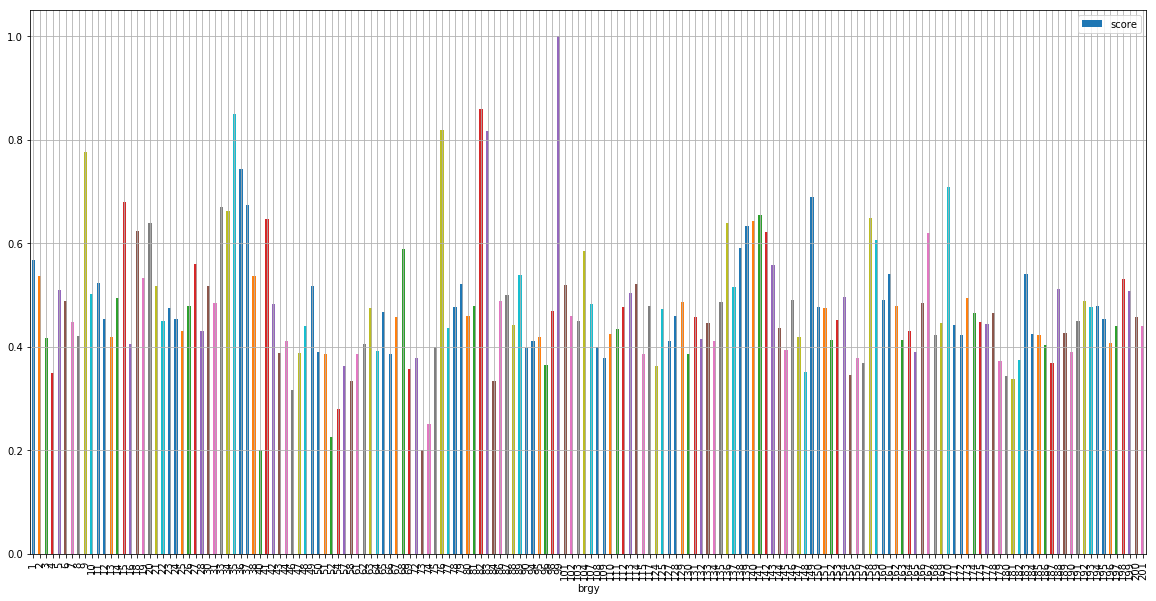

In [10]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()


In [11]:
#arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
#plot.legend()
#plot.show()

# Bar graph of the ARRAY of means of each brgy

In [12]:
dfScore1 = pd.DataFrame(dfBrgyMeanScore);
dfScore1.to_csv('BrgyScore1.csv', encoding='utf-8')

# The computed means for each baranggay's family college literacy rate is saved onto a CSV file for future use.

NameError: name 'dfBrgyMeanScore' is not defined